# Cuaderno de Notas de Métodos Numéricos
## Solución de ecuaciones: bisección y falsa posición
### Prof. Jorge I. Zuluaga


#### Ejecutarme siempre

A continuación descargamos en el espacio virtual de este cuaderno todos los archivos necesarios para que las notas del curso funcionen bien:

In [ ]:
!git clone https://github.com/JorgeZuluaga/NotasMetodosNumericos
!ln -s NotasMetodosNumericos mn
!make -C mn pull

Cloning into 'NotasMetodosNumericos'...
remote: Enumerating objects: 108, done.
remote: Counting objects: 100% (108/108), done.
remote: Compressing objects: 100% (85/85), done.
remote: Total 108 (delta 46), reused 82 (delta 20), pack-reused 0
Receiving objects: 100% (108/108), 8.53 MiB | 19.32 MiB/s, done.
Resolving deltas: 100% (46/46), done.
make: Entering directory '/content/NotasMetodosNumericos'
git reset --hard HEAD
HEAD is now at 876de31 Commit
git pull origin master
From https://github.com/JorgeZuluaga/NotasMetodosNumericos
 * branch            master     -> FETCH_HEAD
Already up to date.
make: Leaving directory '/content/NotasMetodosNumericos'


## Un vistazo de la clase

  Qué veremos en esta clase:

  - Recordemos.
  - El método de bisección.
  - Algoritmo y programa en Python.
  - Análisis del método.
  - El método de falsa posición.

  Para leer en el libro: sección 2.1.

## Recordemos

### Motivación

- Un jugador de baloncesto quiere encestar una pelota en el aro.  Su altura $h$, la altura $H$ del aro, la distancia a la que se encuentra $D$ y la velocidad $v$ con la que el jugador lanza típicamente la pelota se conocen bien.  Solo necesita calcular el ángulo $\theta$ en el que debe lanzarla.

<center><img src="https://raw.githubusercontent.com/JorgeZuluaga/NotasMetodosNumericos/master/figuras/ejemplo-baloncesto.png" width=400></center>

- Para resolvere el problema es necesario resolver la ecuación:

  $$
  H=D \tan \theta-\frac{1}{2} g \frac{D^{2}}{v^{2} \cos ^{2} \theta}+h
  $$
  la única cantidad desconocida aquí es el ángulo $\theta$.

- Pero ¿se puede despejar $\theta$ de esta ecuación fácilmente? (en términos de funciones elementales? **¡no realmente!**

- La solución a esta ecuación pertenece a una familia general de problemas que se conoce como **solución a una ecuación de una variable** que tiene la forma general:

  $$
  h(x)=g(x)
  $$
  graficamente este problema es equivalente a encontrar la intersección de dos curvas:

  <img src="https://raw.githubusercontent.com/JorgeZuluaga/NotasMetodosNumericos/master/figuras/raices.png">

- Todo problema de solución a una ecuación de una variable se puede escribir en la forma:
 
  $$
  f(x)=0
  $$

  en cuyo caso se llama **raíz de la función** $f(x)$.  Graficamente este problema es equivalente a encontrar el punto del eje x por el que pasa la función.

- Cuando una ecuación de una variable de la forma $h(x)=g(x)$ o de la forma $f(x)=0$ no puede resolverse usando métodos algebraicos, o no puede encontrarse su solución en términos de funciones elementales, decimos que es una **ecuación trascendental**.  Ejemplo:

  $$
  x=\sin x
  $$

## Métodos acotados

- Existen dos tipos de métodos numéricos para encontrar la solución a ecuaciones de una variable:

  - **Métodos acotados**: son métodos para los cuáles se debe conocer el íntervalo en el que se encuentra la raíz.  Es decir, como entradas, estos métodos necesitan un intervalo $[a,b]$ tal que $p\in[a,b]$.

  - **Métodos abiertos**: son métodos para los cuáles no se conoce el intervalo.  Es decir, como entrada, estos métodos solo necesitan el valor aproximado de la solución $p$.

### Método de bisección

- Es el método más simple para encontrar la raíz de una función $f(x)$. 

- Como entradas necesita dos números $a_1=a$ y $b_1=b$ tal que $f(a_1)$ y $f(b_1)$ tengan signos opuestos.  Esta condición garantiza que existe al menos un punto $p$ en el intervalo $[a_1,b_1]$ en el que $f(p)=0$.

  <center><img src="https://raw.githubusercontent.com/JorgeZuluaga/NotasMetodosNumericos/master/figuras/metodo-biseccion.png" width=400></center>

- Se llama **método de bisección** porque el método comienza suponiendo que el valor de la raíz es el **punto medio del intervalo**:

  $$
  p_1 = \frac{a_1+b_1}{2}
  $$


- A continuación se pueden dar 3 situaciones:

  1. Que $p_1$ sea la raíz, es decir que $f(p_1)=0$ (muy improbable).

  2. Que la raíz quede entre $a_1$ y $p_1$, es decir que $f(a_1)$ y $f(p_1)$ tengan signos opuestos.  En ese caso se puede repetir el procedimiento definiendo un nuevo intervalo:

     $$
     a_2 = a_1, b_2 = p_1
     $$

  3. Que la raíz quede entre $p_1$ y $b_1$, es decir que $f(p_1)$ y $f(b_1)$ tengan signos opuestos.

  En ese caso se puede repetir el procedimiento definiendo un nuevo intervalo:

     $$
     a_2 = p_1, b_2 = b_1
     $$

- Una vez definido el nuevo intervalo, se calcula la nueva aproximación:

  $$
  p_2 =  \frac{a_2+b_2}{2}
  $$

- El procedimiento anterior se repite hasta que se cumpla una condición de parada.

#### Error y criterio de parada

- En cada paso el error obtenido en la nueva aproximación se puede estimar como:

  1. **Error por intervalo**: como sabemos que la raíz está sin duda alguna en el intervalo, la mitad tamaño del intervalo en el que se busca es un buen estimativo del error, $p^* = p_n \pm (b_n-a_n)/2$.

  2. **Error por aproximaciones sucesivas**: otro intervalo que se puede considerar contiene la raíz es el intervalo definido por dos raíces consecutivas, es decir $p^* = p_n \pm |p_{n}-p_{n-1}|/2$.

- El procedimiento se repite hasta que en el paso $n$ se produzca cualquiera de las siguientes condiciones:

  1. Se encuentre la raíz, es decir $f(p_n)=0$.
  2. El íntervalo de búsqueda sea muy pequeño $(b_n-a_n)/2<TOL$, donde $TOL$ es una tolerancia.
  3. El íntervalo definido por raíces sucesivas es muy pequeño $(b_n-p_{n-1})/2<TOL$.

#### Algoritmo

- Un algoritmos del método de bisección se muestra en la figura abajo:



### Gráficos en Python

- Para resolver una ecuación o hayar una raíz o encontrar los ceros de una función, se debe poder graficar la función.

- A continuación aprenderemos a hacer gráficos en Python

#### Gráficos básicos

- En Python existe una biblioteca de rutinas (algoritmos) para graficar conocida como `matplotlib` que se importa usando:

In [ ]:
import matplotlib

- Python no grafica funciones, solo gráfica listas de números.  A continuación se muestra un ejemplo de un gráfico en Python:

In [ ]:
x = [1,2,3,4,5]
y = [1,4,9,16,25]

matplotlib.pyplot.plot(x,y)

- Como puede verse en el eje x están los valores de la lista de $x$ y en los de y los de la lista de $y$.

- Es posible en un mismo gráfico colocar varias listas:

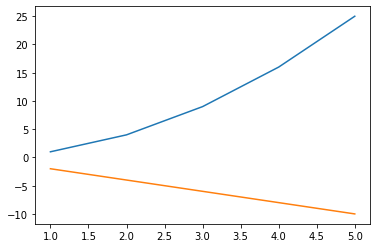

In [ ]:
x = [1,2,3,4,5]
y = [1,4,9,16,25]
z = [-2,-4,-6,-8,-10]

matplotlib.pyplot.plot(x,y)
matplotlib.pyplot.plot(x,z)


- La biblioteca tiene muchísimas funciones que permiten convertir un gráfico sencillo en una figura que puede usarse en un trabajo o un artículo.  En el ejemplo a continuación se muestra un ejemplo detallado en el que los comandos se entienden por su nombre:

(-15.0, 30.0)

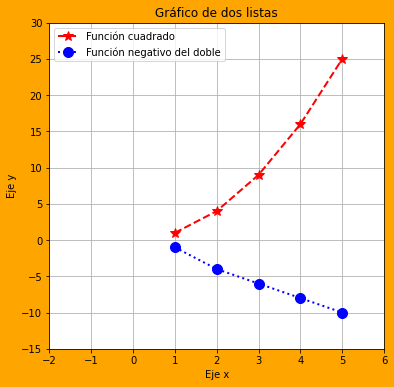

In [ ]:
#Para mayor brevedad es mejor importar matplotlib así:
import matplotlib.pyplot as plt

x = [1,2,3,4,5]
y = [1,4,9,16,25]
z = [-1,-4,-6,-8,-10]

#Define las propiedades del gráfico
plt.figure(figsize=(6,6),facecolor='orange') #El tamaño está en unidades arbitrarias
#Los colores reconocidos son: black (k), white (w), green (g), blue (b), red (r), cyan (c), magenta (m), yellow (y), orange (o)

#Comando gráfico con opciones de estilo
plt.plot(x,y,color='r',linewidth=2,linestyle='--',marker='*',markersize=10,label="Función cuadrado")
#Estilos de línea: -, --, :, -.
plt.plot(x,z,color='b',linewidth=2,linestyle=':',marker='o',markersize=10,label="Función negativo del doble")
#Marcadores: o (bola), s (cuadrado), ^ (triangulo), v (triangulo)

#Decoración
#Título de la gráfica
plt.title("Gráfico de dos listas")
#Marcas de los ejes
plt.xlabel("Eje x")
plt.ylabel("Eje y")
#Dibuja una cuadricula que ayuda a ubicar los puntos
plt.grid()
#Dibuja una etiqueta
plt.legend(loc="upper left")
#Se puede definir que rango de valores de x o de y se quiere usar (no es obligatorio)
plt.xlim(-2,6)
plt.ylim(-15,30)

#### Gráficos de funciones con Python

- Para graficar una función en Python es necesario: 1) generar una lista de valores de la variable $x$ en el que la función exista y sea continua, 2) evaluar la función en esos valores de $x$.

- Para generar una lista arbitraria de valores de $x$ se usa en Python las funciones de generación de listas de la biblioteca `numpy`.

- Hay dos funciones para ello:

  - `linspace`: genera una lista con un determinado número de valores `N`, entre dos extremos `inicio` y `fin`.  Se invoca así:
    ```
    np.linspace(inicio,fin,N)
    ```

   En este caso el valor fin se incluye en la lista.
   
  - `arange`: genera una lista partiendo de un valor `inicio` hasta un valor `fin` con saltos definidos con `paso`.
    ```
    np.arange(inicio,fin,paso)
    ```

   En este caso el valor `fin` no se incluye en la lista.

- Veamos algunos ejemplos en Python:

In [ ]:
import numpy as np
np.linspace(0,1,11)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

- Nótese que como el valor comenzó en 0, al dividir en 11, el tamaño de cada *subintervalo* es igual al tamaño del intervalo total sobre 10 (no sobre 11).

In [ ]:
np.arange(0,1,0.1)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

- Nótese que el valor final, 1, no se incluyo.  Si se desea incluir debe usarse:

In [ ]:
np.arange(0,1.01,0.1)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

- Es decir, poner el valor final un poquito más grande

- Con estas herramientas a la mano podemos proceder a ver como se gráfica una función, por ejemplo, la función $h(x)=\sin x$:

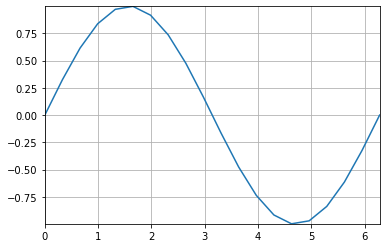

In [ ]:
x=np.linspace(0,2*np.pi,20)
y=np.sin(x)

plt.plot(x,y)
plt.grid()
plt.margins(0)

- Nótese que la función `np.sin` puede recibir un número pero también una lista.  El resultado de pasar a una función una lista de valores, es también una lista:

In [ ]:
print(x)
print(y)

[0.         0.33069396 0.66138793 0.99208189 1.32277585 1.65346982
 1.98416378 2.31485774 2.64555171 2.97624567 3.30693964 3.6376336
 3.96832756 4.29902153 4.62971549 4.96040945 5.29110342 5.62179738
 5.95249134 6.28318531]
[ 0.00000000e+00  3.24699469e-01  6.14212713e-01  8.37166478e-01
  9.69400266e-01  9.96584493e-01  9.15773327e-01  7.35723911e-01
  4.75947393e-01  1.64594590e-01 -1.64594590e-01 -4.75947393e-01
 -7.35723911e-01 -9.15773327e-01 -9.96584493e-01 -9.69400266e-01
 -8.37166478e-01 -6.14212713e-01 -3.24699469e-01 -2.44929360e-16]


### Solución de ecuaciones de una variable usando gráficos en Python

- Volviendo al problema original, imaginemos que necesitamos encontrar la solución a la ecuación en una variable:

  $$
  x=\sin(2x)
  $$

- Para hacerlo primero identificamos que el problema es equivalente a encontrar la intersección de las funciones $g(x)=x$ y $h(x)=\sin(2x)$, o también, encontrar los ceros de la función $f(x)=x-\sin(2x)$.

- Hagamos el gráfico de $g(x)$ y $h(x)$:

In [ ]:
x=np.linspace(0,np.pi/2,100)
gx=x
hx=np.sin(2*x)

plt.plot(x,gx,'r-',label="Función g(x)=x")
plt.plot(x,hx,'b--',label="Función h(x)=sin(2x)")

plt.legend()
plt.grid()
plt.margins(0)

- Como puede verse la intersección se produce alrededor de $p\approx 0.95$.

- Si queremos precisar dónde se produce, podemos usar `xlim` para mostrar la intersección mejor:

In [ ]:
x=np.linspace(0,np.pi/2,100)
gx=x
hx=np.sin(2*x)

plt.plot(x,gx,'r-',label="Función g(x)=x")
plt.plot(x,hx,'b--',label="Función h(x)=sin(2x)")

plt.legend()
plt.grid()
plt.xlim(0.9,1.0)
plt.margins(0)

- De aquí se deduce que la raíz de la función es cercana $p\approx 0.948$.

- Naturalmente una aproximación mayor permitirá precisar mejor la raíz:

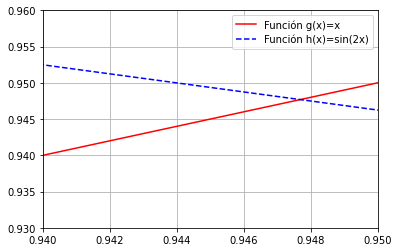

In [ ]:
x=np.linspace(0,np.pi/2,100)
gx=x
hx=np.sin(2*x)

plt.plot(x,gx,'r-',label="Función g(x)=x")
plt.plot(x,hx,'b--',label="Función h(x)=sin(2x)")

plt.legend()
plt.grid()
plt.xlim(0.94,0.95)
#Esto amplia el gráfico en dirección vertical
plt.ylim(0.93,0.96)
plt.margins(0)

- Lo mismo puede hacerse con la función $f(x)=x-\sin(2x)$.

In [ ]:
x=np.linspace(0,np.pi/2,100)
fx=x-np.sin(2*x)

plt.plot(x,fx,'r-')

plt.grid()
plt.margins(0)

- Como puede verse la función (curva en rojo), pasa por el eje x (valor en vertical 0), cerca a $p\approx 0.948$

### Solución al ejemplo inicial

- Ya tenemos todos los elementos para resolver nuestro problema original, usando para ello gráficos en Python.

- Recordemos la ecuación que queremos resolver:

  $$
  H=D \tan \theta-\frac{1}{2} g \frac{D^{2}}{v^{2} \cos ^{2} \theta}+h
  $$

- Lo primero que debemos es reconocer la variable que buscamos: $\theta$.

- Para resolver el problema como la raíz de una función podemos escribir la ecuación de la forma:

  $$
  D \tan \theta-\frac{1}{2} g \frac{D^{2}}{v^{2} \cos ^{2} \theta}+h-H=0
  $$
  (lo único que hicimos fue pasar $H$ a restar al lado derecho).

- Escrito así, la función cuya raíz queremos encontrar es:

  $$
  f(\theta)=D \tan \theta-\frac{1}{2} g \frac{D^{2}}{v^{2} \cos ^{2} \theta}+h-H
  $$

- Vamos a tomar los valores del gráfico: $H=3.05$, $h=2.0$, $D=10$ y asumiremos un valor de la velocidad de $v=10$ m/s (que son 36 km/h).  Hagamos un grafico de la función con Python:

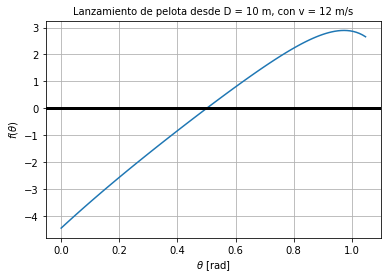

In [ ]:
#Valor de los parametros fisicos
H=3.05
h=2.0
D=10
v=12
g=9.8

#Listas
teta=np.linspace(0,np.pi/3,100)
fteta=D*np.tan(teta)-0.5*g*D**2/(v**2*np.cos(teta)**2)+h-H

#Gráfico
plt.plot(teta,fteta)
#Una línea horizontal negra para ver mejor el eje x
plt.axhline(0,color='k',linewidth=3)

#Decoración
plt.title(f"Lanzamiento de pelota desde D = {D} m, con v = {v} m/s",fontsize=10)
plt.xlabel(r"$\theta$ [rad]")
plt.ylabel(r"$f(\theta)$")
plt.grid()

- Como vemos el ángulo de lanzamiento para encestar será: $\theta\approx 0.5$ rad.  ¿Cuántos grados será eso?.

- Si hacemos un *zoom* en el gráfico y ponemos en el eje x el ángulo en grados, se sabe mejor:

In [ ]:
#Valor de los parametros fisicos
H=3.05
h=2.0
D=10
v=12
g=9.8

#Listas
teta=np.linspace(0,np.pi/3,100)
fteta=D*np.tan(teta)-0.5*g*D**2/(v**2*np.cos(teta)**2)+h-H

#Gráfico
#Podemos multiplicar el ángulo en radianes por 180/pi para que quede en grados
plt.plot(teta*180/np.pi,fteta)
#Una línea horizontal negra para ver mejor el eje x
plt.axhline(0,color='k',linewidth=3)

#Decoración
plt.title(f"Lanzamiento de pelota desde D = {D} m, con v = {v} m/s",fontsize=10)
plt.xlabel(r"$\theta$ [rad]")
plt.ylabel(r"$f(\theta)$")
#Como la lista en el eje x está en grados, el zoom se puede hacer en grados
plt.xlim(28,30)
plt.ylim(-0.25,0.25)
plt.grid()

- Con este gráfico podemos decir que el ángulo de lanzamiento (la solución a la ecuación original) debe ser cercano a $p\approx 28.75$ grados

## Continuará...

## Ejercicios

1. Partiendo del resultado obtenido en clase para el ángulo y la ecuación:

   $$
   H=v \sin \theta T-\frac{g T^{2}}{2}+h
   $$

   encuentre el valor del tiempo $T$ que se demora la bola en volar desde las manos del tirador hasta el aro usando:

   - a) El método gráfico.

   - b) Resolviendo la ecuación algebraica con la fórmula del bachiller:

     $$
     x_{1,2}=\frac{-b \pm \sqrt{b^{2}-4 a c}}{2 a}
     $$

  Compare las dos respuestas

-----
*Fin*